In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
%%time
path = 'models/linear_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(225, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1160      
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 225)               4725      
                                                                 
Total params: 6,725
Trainable params: 6,725
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1266/1266 [==============================] - 2s 1ms/step - loss: 5.5383 - accuracy: 0.0229 - val_loss: 5.0489 - val_accuracy: 0.0633
Epoch 2/100
1266/1266 [==================

INFO:tensorflow:Assets written to: models/linear_class_pca\assets


INFO:tensorflow:Assets written to: models/linear_class_pca\assets


CPU times: total: 45.7 s
Wall time: 2min 32s


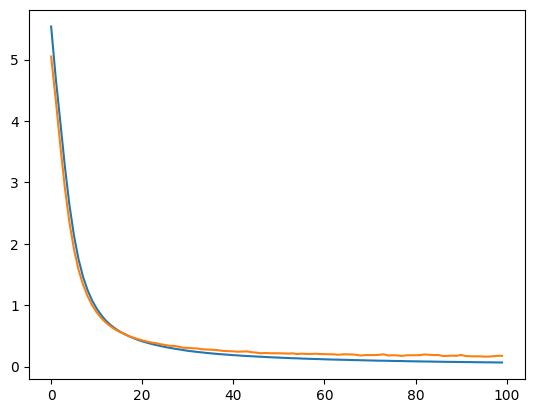

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [7]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 749us/step


<h3>Components from PCA</h3>

In [8]:
pca.n_components_

57

<h3>Classification Report</h3>

In [9]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        19
           1    1.00000   1.00000   1.00000        20
           2    1.00000   1.00000   1.00000        19
           3    1.00000   1.00000   1.00000        23
           4    1.00000   1.00000   1.00000        26
           5    1.00000   1.00000   1.00000        18
           6    1.00000   1.00000   1.00000        24
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        17
           9    1.00000   0.92308   0.96000        26
          10    0.83333   1.00000   0.90909        25
          11    1.00000   1.00000   1.00000        21
          12    1.00000   1.00000   1.00000        23
          13    1.00000   1.00000   1.00000        22
          14    1.00000   1.00000   1.00000        23
          15    1.00000   0.94444   0.97143        18
          16    1.00000   1.00000   1.00000        16
          17    0.88235   1

<h1>Exponential Damage</h1>

In [10]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [12]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
%%time
path = 'models/exp_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(225, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                1220      
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 225)               4725      
                                                                 
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1266/1266 [==============================] - 2s 1ms/step - loss: 5.3980 - accuracy: 0.0393 - val_loss: 4.7556 - val_accuracy: 0.1040
Epoch 2/100
1266/1266 [================

INFO:tensorflow:Assets written to: models/exp_class_pca\assets


INFO:tensorflow:Assets written to: models/exp_class_pca\assets


CPU times: total: 41.7 s
Wall time: 2min 38s


In [14]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 776us/step


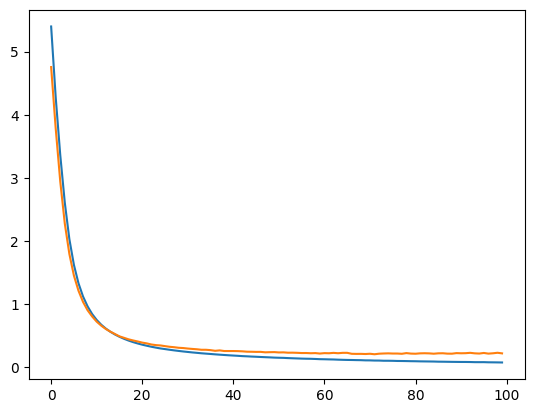

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Components from PCA</h3>

In [16]:
pca.n_components_

60

<h3>Classification Report</h3>

In [17]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        19
           1    1.00000   1.00000   1.00000        20
           2    1.00000   1.00000   1.00000        19
           3    1.00000   1.00000   1.00000        23
           4    1.00000   1.00000   1.00000        26
           5    1.00000   1.00000   1.00000        18
           6    1.00000   1.00000   1.00000        24
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        17
           9    1.00000   0.96154   0.98039        26
          10    0.60976   1.00000   0.75758        25
          11    1.00000   1.00000   1.00000        21
          12    1.00000   1.00000   1.00000        23
          13    1.00000   1.00000   1.00000        22
          14    1.00000   1.00000   1.00000        23
          15    1.00000   0.94444   0.97143        18
          16    1.00000   1.00000   1.00000        16
          17    0.88235   1

<h1>Sigmoid-like Damage</h1>

In [18]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [20]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [26]:
%%time
path = 'models/sig_class_pca_test'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(225, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                7120      
                                                                 
 dense_13 (Dense)            (None, 80)                6480      
                                                                 
 dense_14 (Dense)            (None, 80)                6480      
                                                                 
 dense_15 (Dense)            (None, 225)               18225     
                                                                 
Total params: 38,305
Trainable params: 38,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1266/1266 [==============================] - 2s 1ms/step - loss: 5.4724 - accuracy: 0.0436 - val_loss: 4.7495 - val_accuracy: 0.1076
Epoch 2/300
1266/1266 [==============

INFO:tensorflow:Assets written to: models/sig_class_pca_test\assets


INFO:tensorflow:Assets written to: models/sig_class_pca_test\assets


CPU times: total: 2min 13s
Wall time: 8min 27s


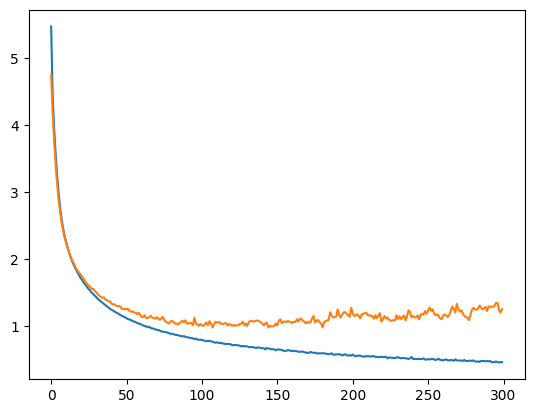

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [28]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 801us/step


<h3>Components from PCA</h3>

In [29]:
pca.n_components_

88

<h3>Classification Report</h3>

In [30]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.94737   0.97297        19
           1    1.00000   0.90000   0.94737        20
           2    1.00000   1.00000   1.00000        19
           3    0.30667   1.00000   0.46939        23
           4    1.00000   0.80769   0.89362        26
           5    0.88889   0.88889   0.88889        18
           6    1.00000   0.91667   0.95652        24
           7    1.00000   0.96000   0.97959        25
           8    1.00000   1.00000   1.00000        17
           9    1.00000   0.84615   0.91667        26
          10    1.00000   1.00000   1.00000        25
          11    1.00000   0.95238   0.97561        21
          12    1.00000   0.95652   0.97778        23
          13    1.00000   0.90909   0.95238        22
          14    1.00000   0.91304   0.95455        23
          15    0.94444   0.94444   0.94444        18
          16    1.00000   0.93750   0.96774        16
          17    0.93750   1